<a href="https://colab.research.google.com/github/SirajShaikh96/Home_LLC/blob/main/Copy_of_HOME_LLC_Analysis_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HOME LLC**
#Project Name - S&P/Case-Shiller U.S. National Home Price Index Prediction

**Project Type - S&P/Case-Shiller U.S. National Home Price Index Prediction**

**Contribution - Individual**

**Project By - Siraj Shaikh**

# **GitHub Link -** https://github.com/SirajShaikh96/Home_LLC

# Bussiness Objective

**The business objective for a project focused on predicting the S&P/Case-Shiller U.S. National Home Price Index involves leveraging predictive modeling to gain insights into future trends in the housing market. The primary goal is to provide valuable information and decision support for stakeholders involved in real estate, finance, investment, and related industries. Here is a detailed business objective for the project:**

**Business Objective: Predictive Modeling for S&P/Case-Shiller U.S. National Home Price Index**

* Market Insights and Strategic Planning:

  * Objective: Develop a predictive model to forecast changes in the S&P/Case-Shiller U.S. National Home Price Index.
  * Purpose: Provide stakeholders with actionable insights into future trends in the housing market, enabling strategic planning and decision-making.

* Risk Mitigation and Investment Decision Support:

  * Objective: Identify potential risks and opportunities in the real estate market.
  * Purpose: Assist investors, developers, and financial institutions in making informed decisions related to real estate investments by assessing the impact of predicted home price movements.

* Financial Product Development:

  * Objective: Enhance existing financial products and create new offerings.
  * Purpose: Use predictive modeling to design financial instruments and investment products that align with anticipated changes in the S&P/Case-Shiller U.S. National Home Price Index, catering to the needs of investors and financial institutions.

* Optimizing Real Estate Portfolios:

  * Objective: Optimize real estate portfolios based on forecasted market conditions.
  * Purpose: Enable real estate portfolio managers to strategically allocate assets, minimize risks, and maximize returns by incorporating predictions of future home price movements.

* Mortgage and Loan Decision Support:

  * Objective: Assist in mortgage and loan underwriting decisions.
  * Purpose: Provide lenders with a tool to assess the potential impact of changing home prices on loan portfolios, aiding in risk management and loan approval processes.

* Policy and Regulatory Compliance:

  * Objective: Ensure compliance with regulatory requirements and industry standards.
  * Purpose: Use predictive modeling to anticipate market changes, enabling businesses to align their practices with regulatory standards and adapt to evolving market conditions.

* Enhanced Market Competitiveness:

  * Objective: Gain a competitive edge in the real estate and financial markets.
  * Purpose: Position the organization as a leader in the industry by leveraging advanced analytics and predictive modeling to offer innovative solutions and services aligned with market dynamics.

* Client Engagement and Communication:

  * Objective: Provide clients with valuable and transparent information.
  * Purpose: Enhance client engagement by delivering accurate and understandable predictions regarding the future direction of the housing market, fostering trust and long-term relationships.


*   Urban population in Percentage----->urban_pop_per

*   Construction_price_index---------------->WPUSI012011
*   Employment-Population Ratio-------------->EMRATIO

*    Federal Funds Effective Rate---------->FEDFUNDS
*    GDP
*  Housing Inventory Estimate Renter Occupied Housing Units in the United States---->ERNTOCCUSQ176N

* Housing Inventory Estimate Total Housing Units in the United States------>ETOTALUSQ176N

*    Housing Subsidies_(Federal)------------>L312051A027NBEA

*    Median Consumer Price Index------------->MEDCPIM158SFRBCLE

*   MORTGAGE30US

* New Privately-Owned Housing Units Completed Total Units------------>COMPUTSA

*  New Privately-Owned Housing Units Under Construction----->UNDCON5MUSA

*    New Constructed_units--->COMPUTSA

*  New_Privately-Owned_Housing_Units_Under_Construction_Total_Units

*  Per Capita_GDP-------->A939RX0Q048SBEA

*  Population--------->POPTHM

*  New_Privately-Owned_Housing_Units_Under_Construction_Total_Units---->UNDCON5MUSA

* Producer_Price_Index_by_Commodity_Metals_and_Metal_Products_Iron_and_Steel-->WPU101

* Real Disposable_Personal_Income------------>DSPIC96

* S&P CASE-SHILLER Index-------------> CSUSHPISA

* Total_Construction_Spending_Total_Construction_in_the_United_States---->TTLCONS

* US population gender

* Working population--------->No_of_Persons

* Monthly_Supply_of_New_Houses_in_the_United_States-------------->MSACSR
* Total Household----->TTLHH
*  permit
*  Housing_Inventory_Estimate_Vacant_Housing_Units_in_the_United _States--->EVACANTUSQ176N

*  Median_Sales_Price_of_Houses_Sold_for_the_United_States----->MSPUS
*  Unemployment Rate ----------->UNRATE

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("/content/prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Quarter,PERMIT,No_of_Persons,COMPUTSA,MSACSR,MEDCPIM158SFRBCLE,MORTGAGE30US,...,GDP,ERNTOCCUSQ176N,ETOTALUSQ176N,EVACANTUSQ176N,MSPUS,male,female,M per 100 F,TTLHH,urban_pop_per
DATE,,,,,,,,,,,,,,,,,,,,,
2002-01-01,117.144,2002,1,1,1665.0,182566431.9,1632,4.2,2.761590,6.9975,...,10783.500000,33707.000000,119061.000000,14342.000000,188700.000000,1.420095e+08,1.463408e+08,97.040,109297.000000,79.4090
2002-02-01,117.845,2002,2,1,1787.0,182798390.1,1671,4.0,3.383524,6.8925,...,10818.153333,33844.333333,119201.666667,14297.000000,188200.000000,1.421219e+08,1.464583e+08,97.039,109462.083333,79.4235
2002-03-01,118.687,2002,3,1,1691.0,183078312.4,1559,4.1,2.872621,7.0140,...,10852.806667,33981.666667,119342.333333,14252.000000,187700.000000,1.422344e+08,1.465758e+08,97.038,109627.166667,79.4380
2002-04-01,119.611,2002,4,2,1669.0,183260453.0,1625,4.3,2.676482,6.9850,...,10887.460000,34119.000000,119483.000000,14207.000000,187200.000000,1.423469e+08,1.466933e+08,97.037,109792.250000,79.4525
2002-05-01,120.724,2002,5,2,1716.0,183508212.5,1705,4.0,2.420198,6.8060,...,10919.653333,34017.000000,119625.000000,14265.666667,184166.666667,1.424593e+08,1.468108e+08,97.036,109957.333333,79.4670


#Analysis

In [3]:
#storing culomn name of df in a variable to check linear correlation
numerical_features = list(set(df.describe().columns)-{'CSUSHPISA'})


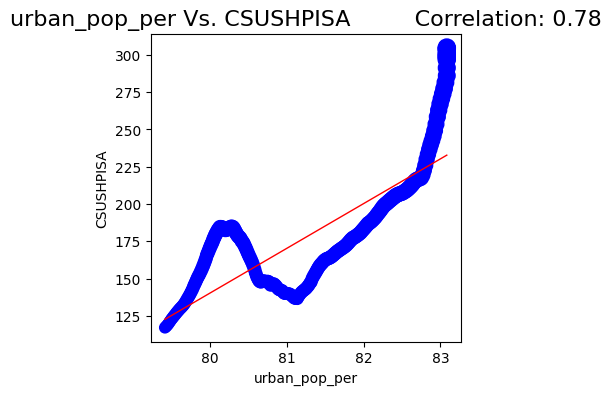

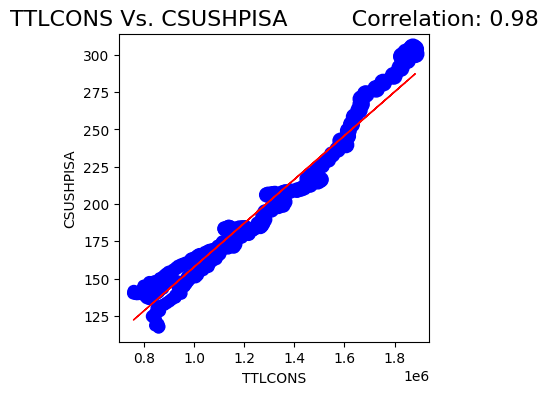

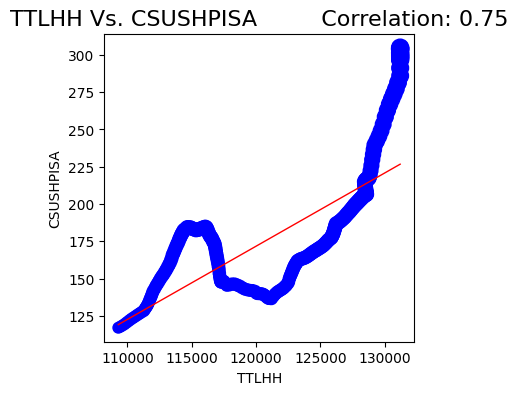

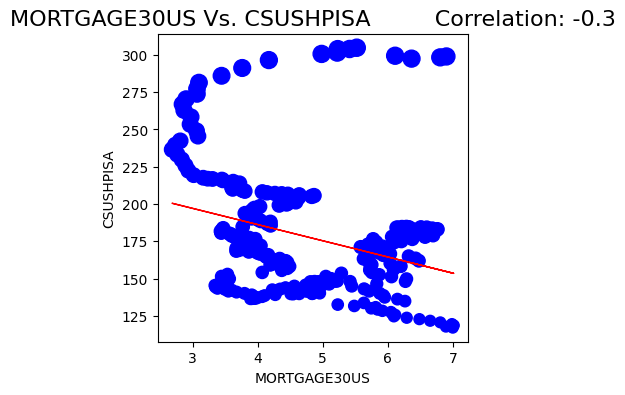

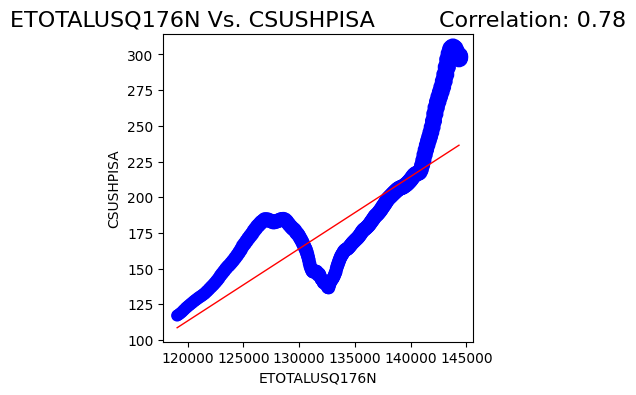

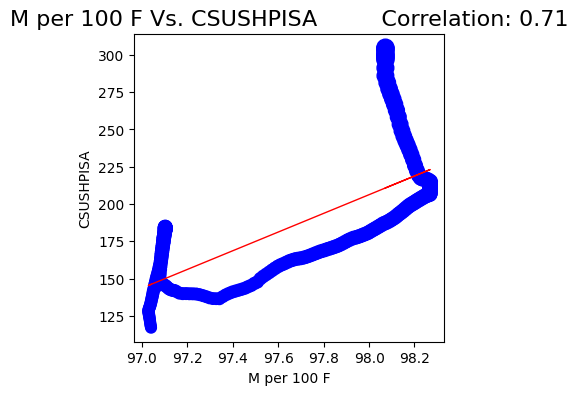

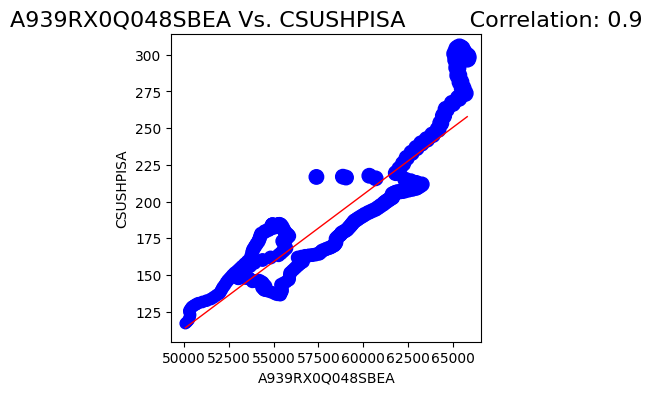

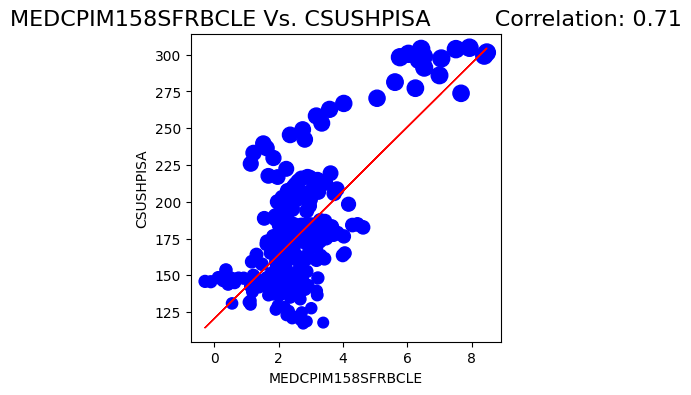

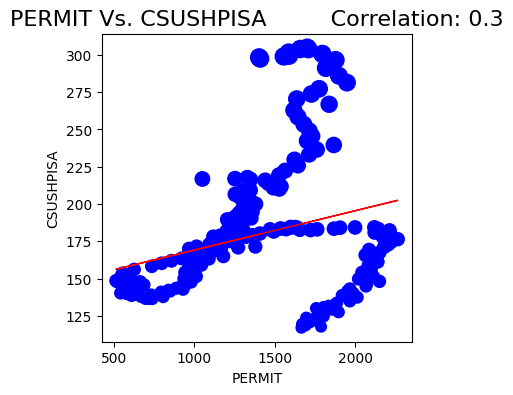

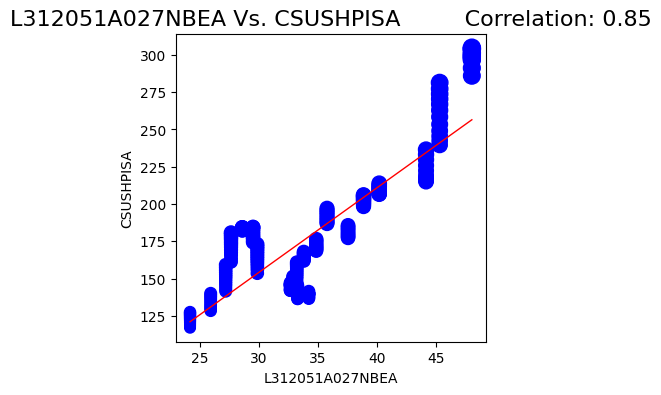

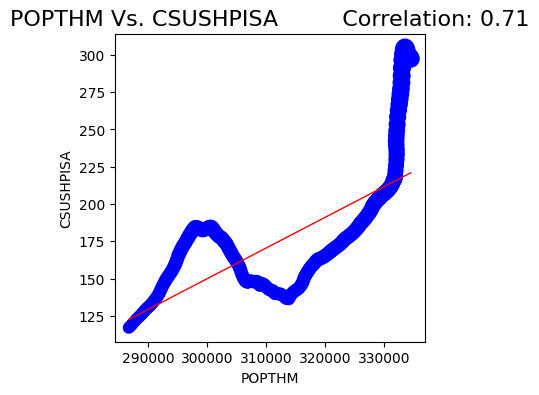

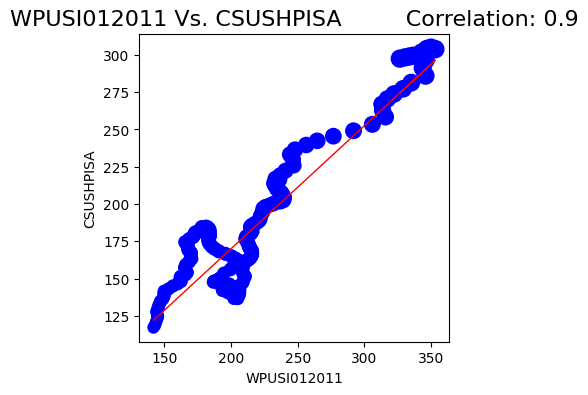

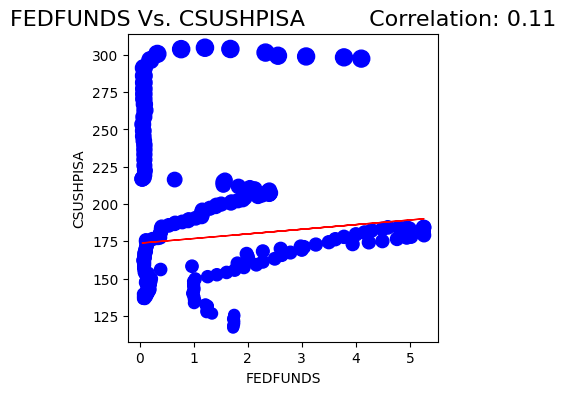

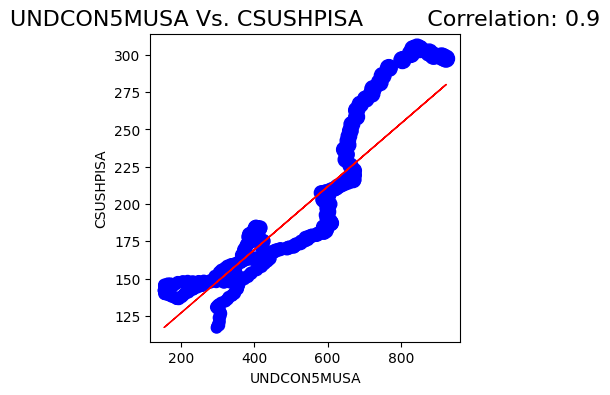

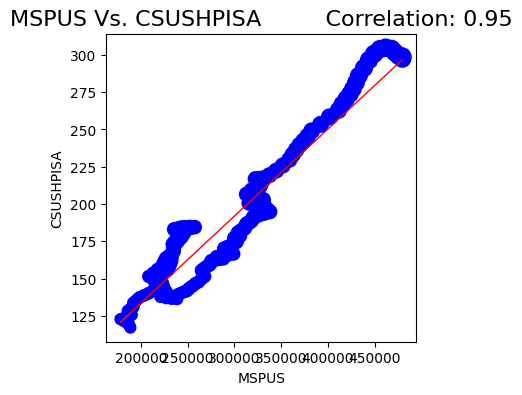

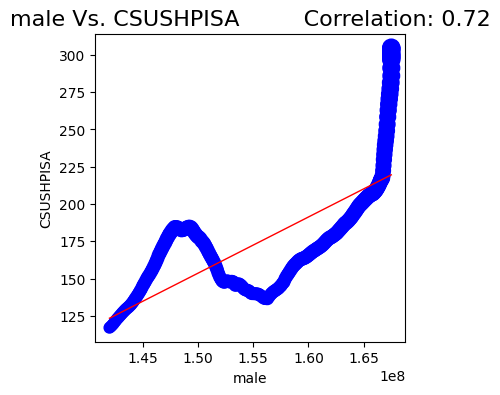

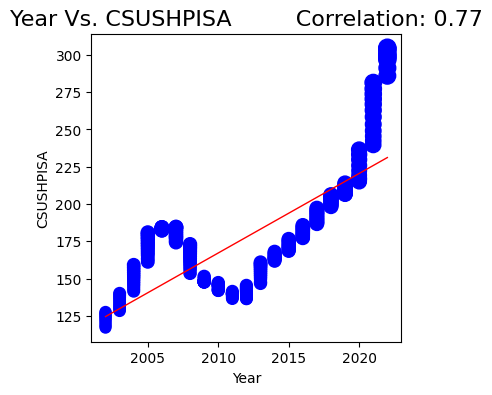

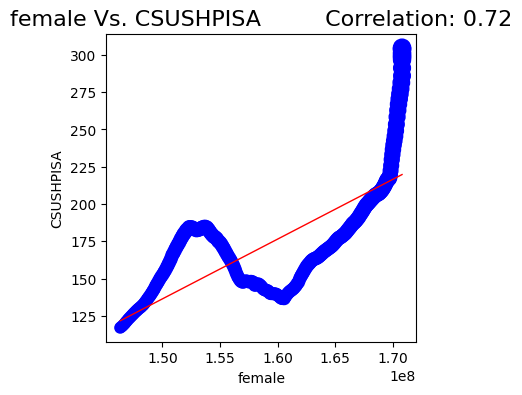

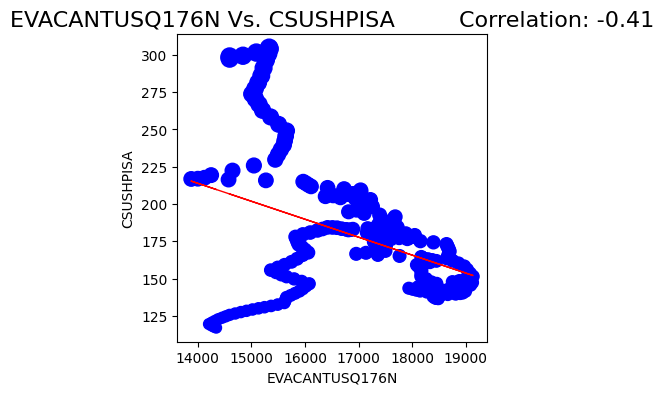

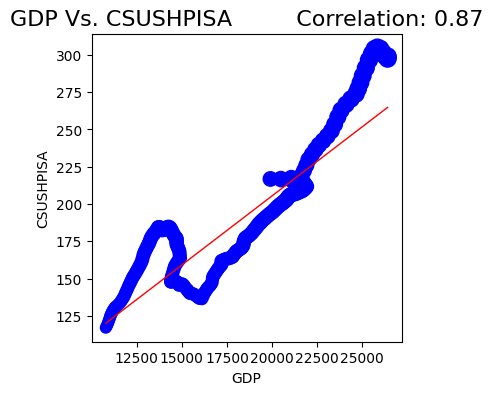

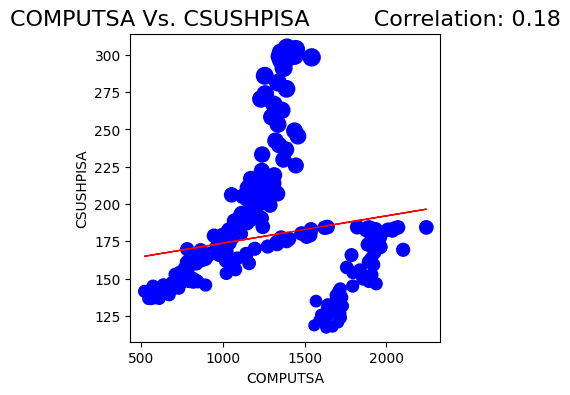

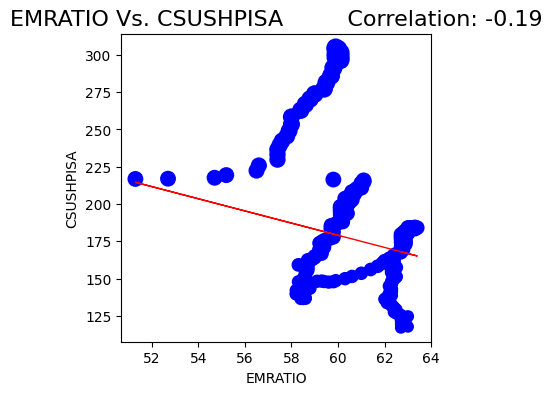

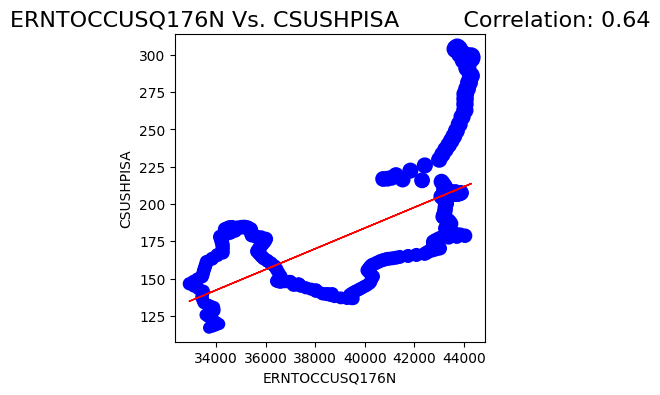

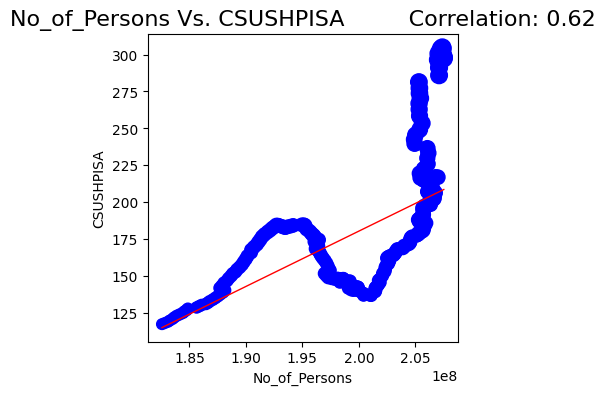

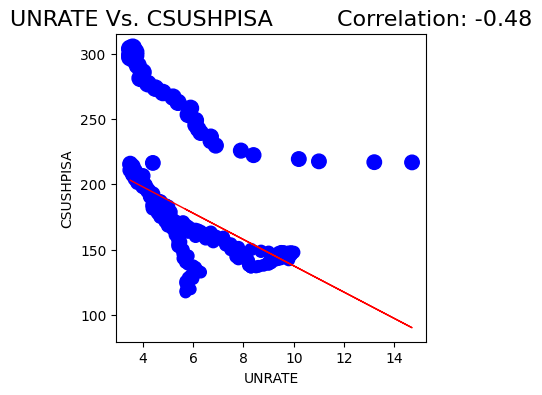

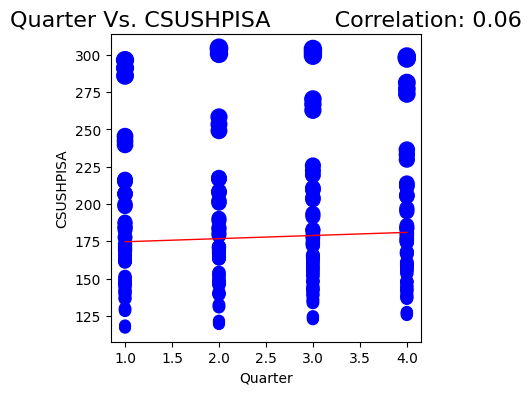

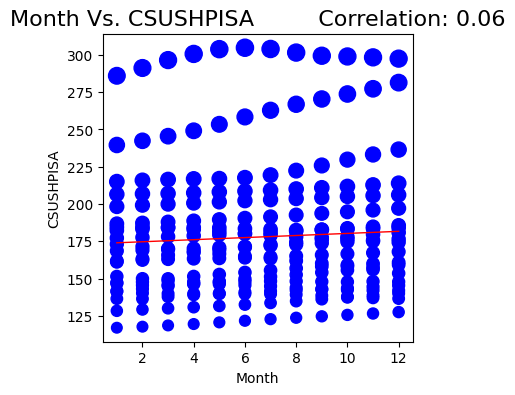

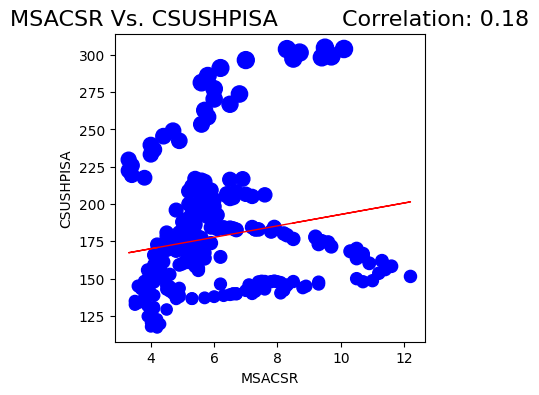

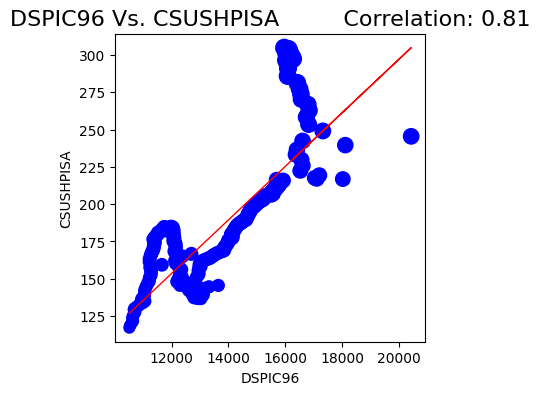

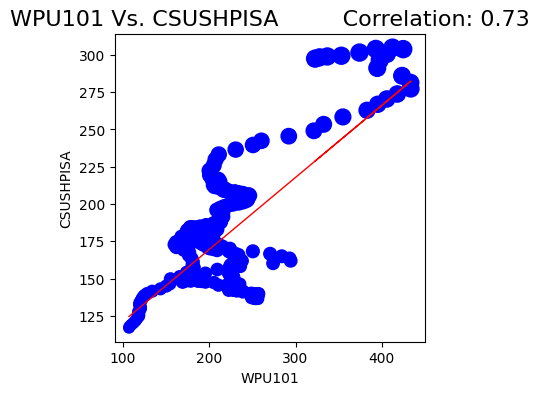

In [4]:
#Show correlation between CSUSHPISA and all other variable
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for col in numerical_features:
  fig = plt.figure(figsize=(4, 4))
  ax = fig.gca()
  feature = df[col]
  label = df['CSUSHPISA']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,marker=".",c="b",s = label*2)
  plt.xlabel(col)
  plt.ylabel('CSUSHPISA')
  ax.set_title(col + ' Vs. CSUSHPISA' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
  z = np.polyfit(df[col], df['CSUSHPISA'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r", lw=1)

  plt.show()

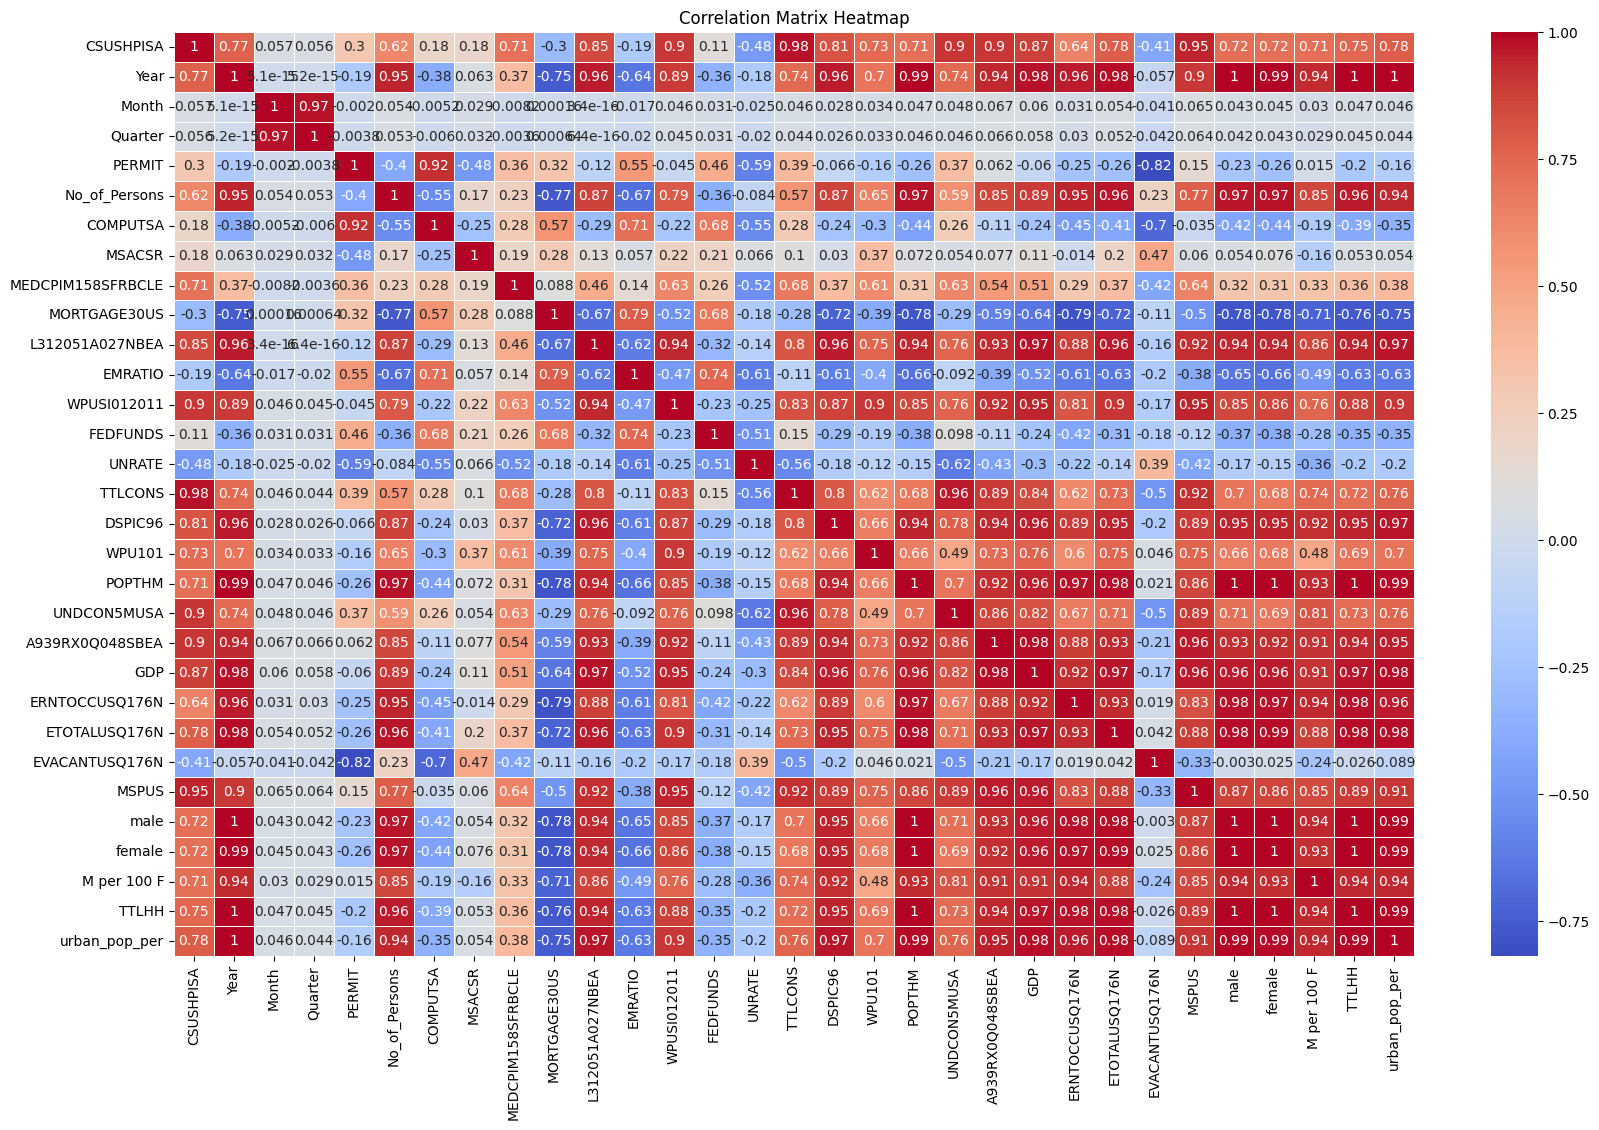

In [5]:
#lets see the correlation among all the variables
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

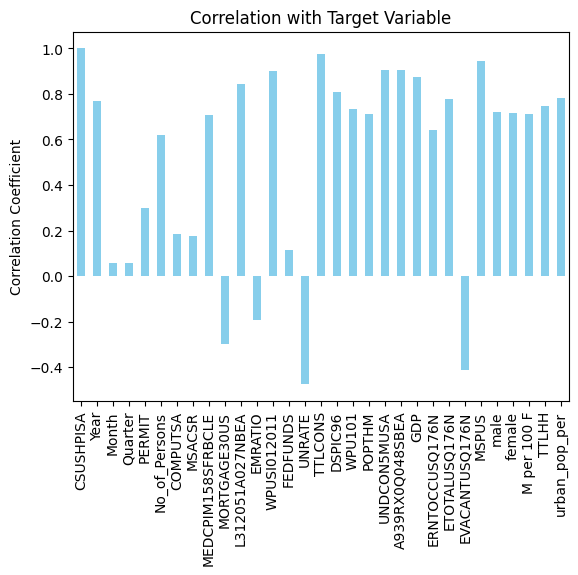

In [6]:
#Checking the correlation of the target variable with every other variable
correlation_with_target = df.corr()['CSUSHPISA']

# Plot the correlation with the target variable
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

**From the correlation plot we can see that variable MSPUS, GDP,A939RX0Q048SBEA, WPUSI012011 and L312051A027NBEA are highly positive correlated.
AND variable like UNRATE, EVACANTUSQ176N  are negatively correlated to CSUSHPISA**

**Lets check distribution of those variables.**


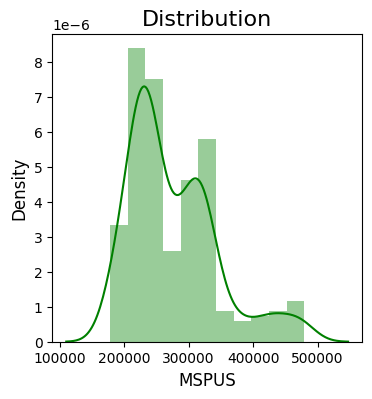

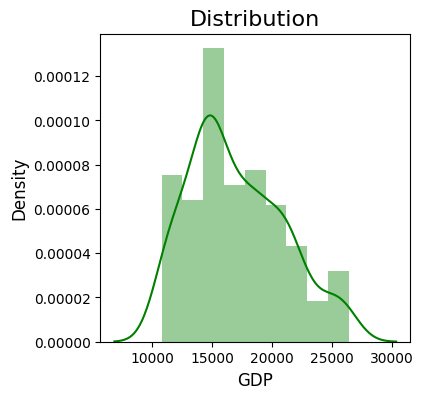

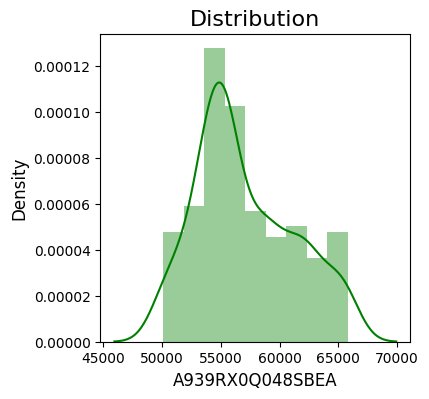

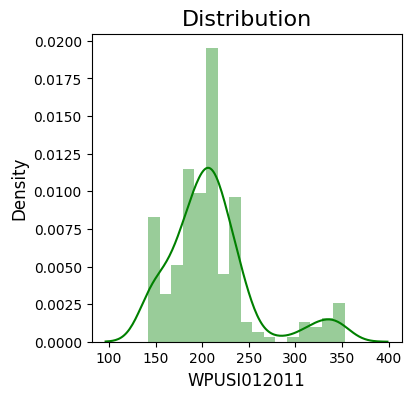

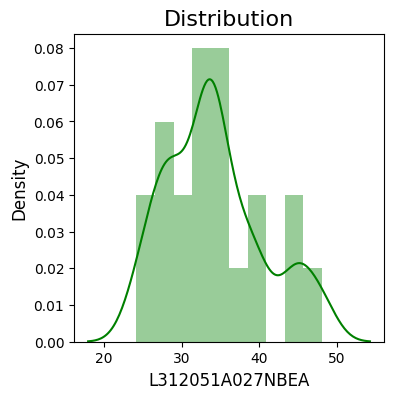

In [7]:
numerical_features = ['MSPUS', 'GDP','A939RX0Q048SBEA', 'WPUSI012011','L312051A027NBEA']

#use for loop for checking  data.
for col in numerical_features:
  plt.figure(figsize=(4,4))
  sns.distplot(df[col], color='green')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.show()

**We can see that all the highly positive coorelated variable are slightly left Skewed.**

**Now let's chekh distributio of negatively correlated variables.**

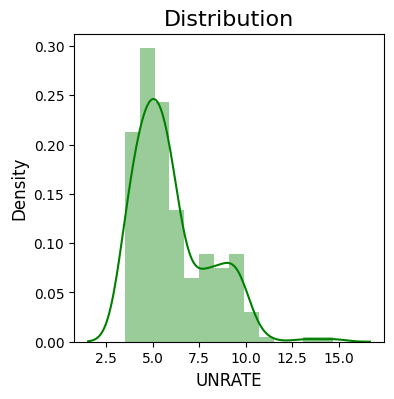

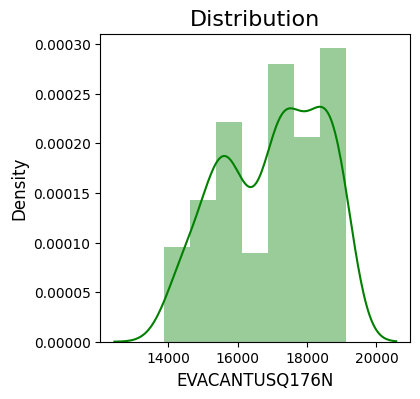

In [8]:
numerical_features = ['UNRATE', 'EVACANTUSQ176N']

#use for loop for checking  data.
for col in numerical_features:
  plt.figure(figsize=(4,4))
  sns.distplot(df[col], color='green')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Density', fontsize=12)
  plt.show()

**We can observe that one variable is right skewed and another is left skewed.**

**Plot CSUSHPISA using plotly express**

* Ease of Use:
   * Plotly Express is designed to be easy to use, with a simple and intuitive syntax. You can create complex visualizations with just a few lines of code, making it accessible for both beginners and experienced users.

* Interactive Visualizations:
  * Plotly Express allows you to create interactive plots, where users can zoom, pan, and hover over data points to get more information. This interactivity is particularly useful for exploring complex datasets and conveying information in a more engaging way.

In [9]:
fig = px.bar(df, x=df.index, y='CSUSHPISA', color="CSUSHPISA", barmode = 'stack', title='S&P/Case-Shiller U.S. National Home Price Index')

# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title= 'CSUSHPISA',width=1300, height=500)
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=df.index, ticktext=df.index)

# Show the plot
fig.show()

#Vsualize Quarterly data of CSUSHPISA to understand every year, in which quarter home price index goes high.


Text(0.5, 0, 'Year')

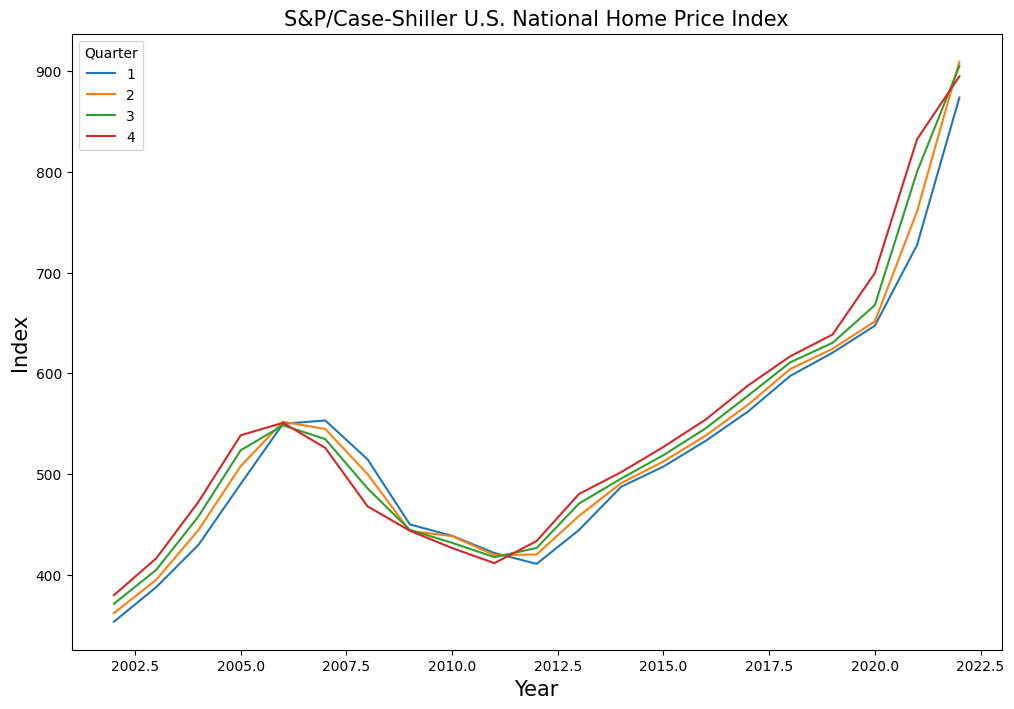

In [10]:
# Group by 'Year' and 'Quarter', and calculate the sum of 'Sales' for each quarter
quarterly_data = df.groupby(['Year', 'Quarter'])['CSUSHPISA'].sum().reset_index()

# Display the quarterly data
CSUSHPISA_Quarter_trend = df.groupby(['Year','Quarter'])['CSUSHPISA'].sum().unstack()
plt.rcParams['figure.figsize'] = [12,8]
CSUSHPISA_Quarter_trend.plot()
plt.title("S&P/Case-Shiller U.S. National Home Price Index",fontsize=15)
plt.ylabel("Index",fontsize=15)
plt.xlabel("Year",fontsize=15)


**We can observe that CSUSHPISA in Q4 of the year is hihgest except between 2006 - 2011**

#Use box plot to check outliers in CSUSHPISA.

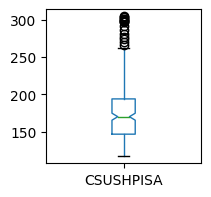

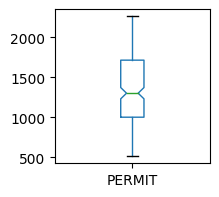

In [11]:
#Box plot
fig = plt.figure(figsize =(2,2))
boxplot = df.boxplot(column=['CSUSHPISA'], grid=False,notch=True)

plt.show()

fig = plt.figure(figsize =(2,2))
boxplot = df.boxplot(column=['PERMIT'], grid=False,notch=True)
plt.show()

**We can see int he box plot there are some outliers, but it is not ouliers instead first time in the history S&P/Case-Shiller U.S. National Home Price Index have gone that high.**

**So don't consider it as outliers, and while training model, we'll use ML model which is robust to outliers.**

#**Let's Build Machine learning model to predict the  S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA).**

#For training purpose separate target variable and independent variable.

In [12]:
#Storing independent variable in X and target variable in y
X = df.drop(columns=['CSUSHPISA', 'Year', 'Month', 'Quarter'])
y  = df['CSUSHPISA']

**Split trainnig data & testing data using train_test_split**

In [13]:
#Splitted training and testing dataset. Took 20% of data for testing.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

#Let's train our first model Random forest Regressor

**Why Random forest regressor:**

*  High Predictive Accuracy


*  Handle Non-Linearity


*  Feature Importance


*  Robust to Overfitting


*  Handles Missing Values

*  No Need for Feature Scaling

*  Reduces Variance

*  Outlier Robustness


In [14]:
#let's train RandomForestRegressor on training data
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [15]:
# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

In [16]:
# Evaluate the model on the test set

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = round(r2_score(y_test, y_test_pred), 4)

# Print evaluation metrics on the test set
print("Mean Absolute Error (MAE) on Test Set:", mae_test)
print("R2-score on Test Set:", r2_test)


Mean Absolute Error (MAE) on Test Set: 1.2886372549019605
R2-score on Test Set: 0.9974


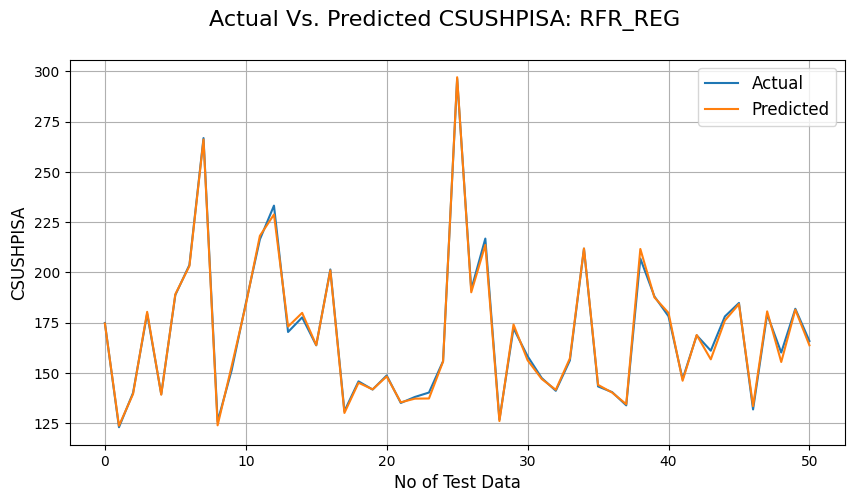

In [17]:
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot((np.array(y_test_pred)))

plt.suptitle('Actual Vs. Predicted CSUSHPISA: RFR_REG', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('CSUSHPISA', fontsize=12)
plt.grid()

**By observing above plot we can see that model predicted test data very well.**

**Here we got R2-score on Test Set: 0.9974. It's a very good model.**

#Let's train 2nd model of Decision Tree Regressor

**Why to use Decision tree:**

* Interpretability

* Non-Linearity

* No Assumptions about Data Distribution

* Handles Mixed Data Types

* Feature Importance

* Ease of Implementation

* Robust to Outliers


* Handling Missing Values


* Scalability

In [18]:
#import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Create a Decision Tree Regressor
tree_reg= DecisionTreeRegressor(max_features=3,random_state=42)

# Train the model
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model using Mean Absolute Error
r2 = r2_score(y_test, y_pred_tree)
print("R2 score (r2):", r2)

R2 score (r2): 0.9968728495496046


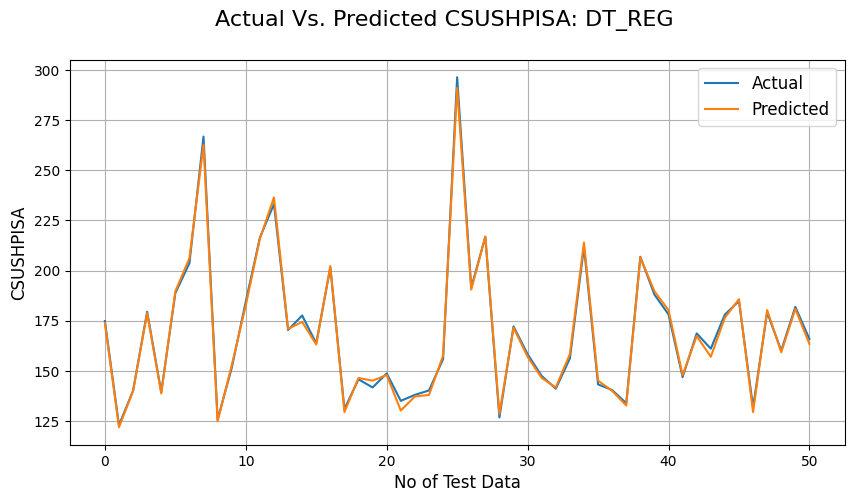

In [19]:
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot((np.array(y_pred_tree)))

plt.suptitle('Actual Vs. Predicted CSUSHPISA: DT_REG', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('CSUSHPISA', fontsize=12)
plt.grid()

**Here we got R2-score on Test Set: 0.996. It's a very good model**

**Save the model in pickle file.**

In [20]:
#import pickle and save both the models as pickle file
import pickle
with open('RF_CSUSHPISA.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('DT_CSUSHPISA.pkl', 'wb') as file:
    pickle.dump(tree_reg, file)

#**Now let's see which feature has impacted the target variable more, Using shapely**

In [21]:
#install the shap library
!pip install shap
import shap
shap.initjs()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.4 MB/s eta 0:00:00


**The shap.initjs() function is part of the SHAP (SHapley Additive exPlanations) library in Python. SHAP values are a way to explain the output of machine learning models by assigning contributions to each feature. These values provide insights into the impact of each feature on a model's predictions.**

**When you use SHAP values with certain visualization functions, such as shap.force_plot or shap.summary_plot, you might need to call shap.initjs() before displaying the plots. This function initializes the JavaScript visualization in Google colab notebook, Jupyter notebooks or other interactive environments.**

#**Explain the feature importance w.r.t target variable.**

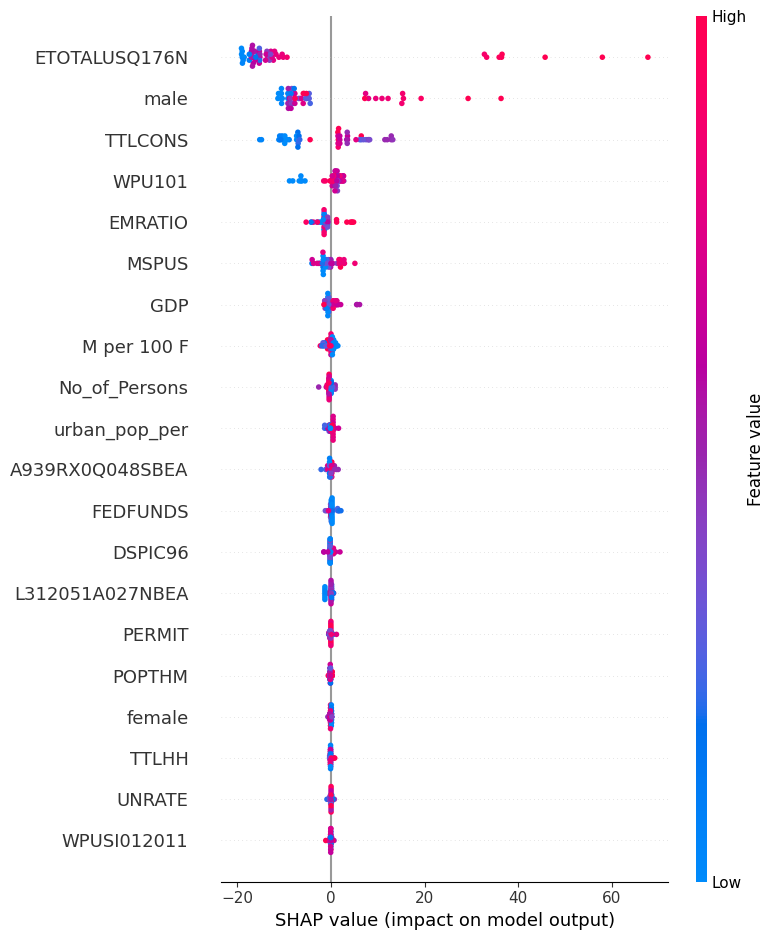

In [22]:
#define a tree explainer for the built decision tree model
explainer = shap.TreeExplainer(tree_reg)
#obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(20,5))
shap.summary_plot(shap_values, X_test)
plt.show()

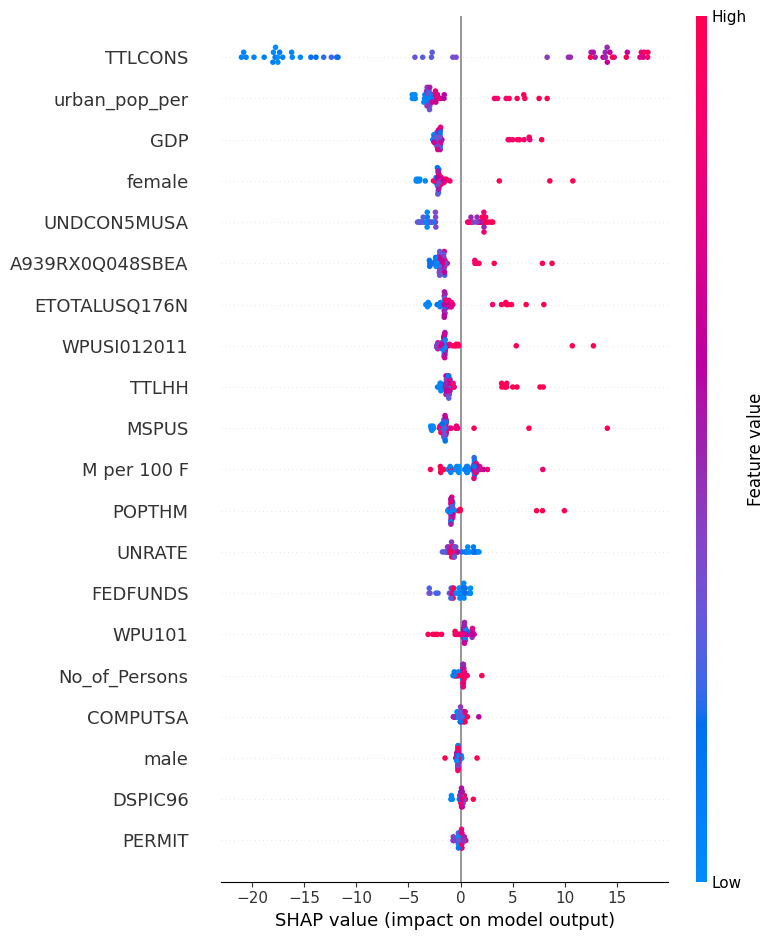

In [23]:
#define a tree explainer for the built decision Randomforest model
explainer = shap.TreeExplainer(rf_model)
#obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(20,5))
shap.summary_plot(shap_values, X_test)
plt.show()

#Let's build a Time Series Forecasting Model to Forecast Monthly S&P/Case-Shiller U.S. National Home Price Index

In [24]:
#let's cast index as datetime
df.index = pd.to_datetime(df.index)

In [25]:
#Now the df_CSUSHPISA.index is in datetime format
df.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='DATE', length=252, freq=None)

<Axes: title={'center': 'S&P/Case-Shiller U.S. National Home Price Index'}, xlabel='DATE'>

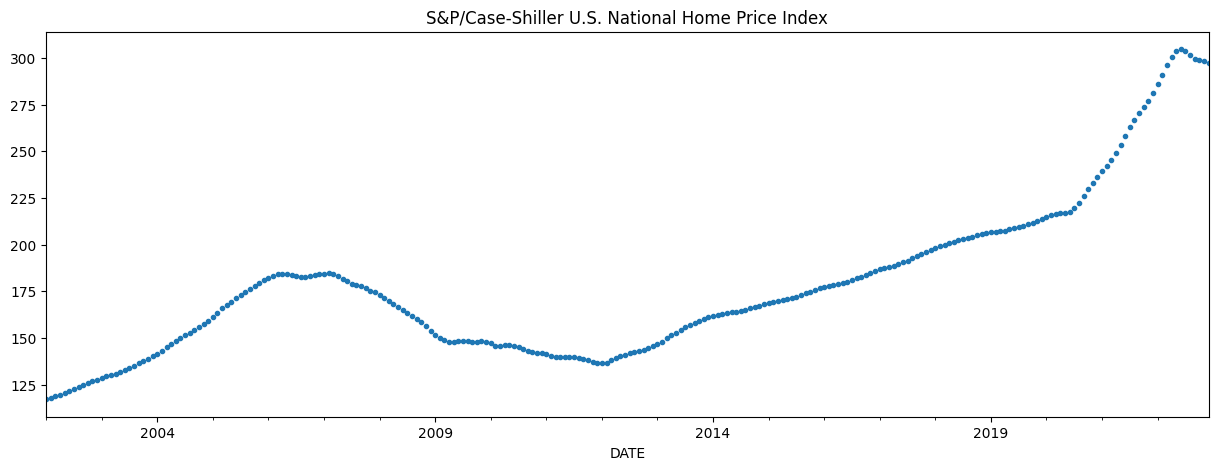

In [26]:
#let's plot df_CSUSHPISA to visualize trend over the time
color_pal = sns.color_palette()
df['CSUSHPISA'].plot(style='.',
                  figsize=(15,5),
                  color=color_pal[0],
                  title='S&P/Case-Shiller U.S. National Home Price Index')

#Split training data and test data for time series forecasting

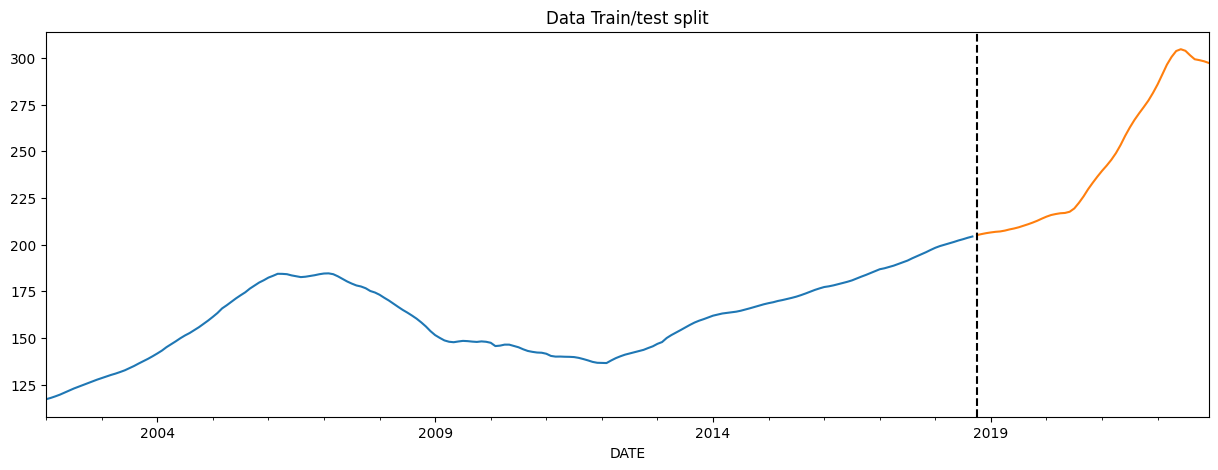

In [27]:
#let's split the df_CSUSHPISA for traing and testing using train_test_split
train_f = df.loc[df.index < '2018-10-01']
test_f = df.loc[df.index >= '2018-10-01']

#plot training data and test data
fig, ax = plt.subplots(figsize=(15,5))
train_f['CSUSHPISA'].plot(ax=ax, label='Trianing Set', title='Data Train/test split')
test_f['CSUSHPISA'].plot(ax=ax, label='Test Set')
ax.axvline('2018-10-01',color='black', ls="--")
plt.show()

#Time series forecasting model training

In [29]:
#storing independent variables columns name in features1 and target variable in target for further process
features1= ['Year', 'Month', 'Quarter', 'PERMIT', 'No_of_Persons',
       'COMPUTSA', 'MSACSR', 'MEDCPIM158SFRBCLE', 'MORTGAGE30US',
       'L312051A027NBEA', 'EMRATIO', 'WPUSI012011', 'FEDFUNDS', 'UNRATE',
       'TTLCONS', 'DSPIC96', 'WPU101', 'POPTHM', 'UNDCON5MUSA',
       'A939RX0Q048SBEA', 'GDP', 'ERNTOCCUSQ176N', 'ETOTALUSQ176N',
       'EVACANTUSQ176N', 'MSPUS', 'male', 'female', 'M per 100 F', 'TTLHH',
       'urban_pop_per']

target = 'CSUSHPISA'

In [30]:
#Preparing traing and testing data
X_train = train_f[features1]
y_train = train_f[target]

X_test = test_f[features1]
y_testn = test_f[target]

#Use XGBRegressor to train anf forecast Home price index.


In [31]:
#Setting hyperparameter to tune XGBoost model
forecast_reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
forecast_reg.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_test,y_testn)],verbose=100)

[0]	validation_0-rmse:21.05980	validation_1-rmse:91.39358
[100]	validation_0-rmse:8.36628	validation_1-rmse:72.22535
[200]	validation_0-rmse:3.40995	validation_1-rmse:64.81689
[300]	validation_0-rmse:1.44653	validation_1-rmse:61.64686
[400]	validation_0-rmse:0.65027	validation_1-rmse:60.12518
[500]	validation_0-rmse:0.31920	validation_1-rmse:59.46995
[600]	validation_0-rmse:0.17469	validation_1-rmse:59.10426
[700]	validation_0-rmse:0.10585	validation_1-rmse:58.87002
[800]	validation_0-rmse:0.07290	validation_1-rmse:58.75732
[900]	validation_0-rmse:0.05408	validation_1-rmse:58.69188
[999]	validation_0-rmse:0.04370	validation_1-rmse:58.65553


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Feature importance

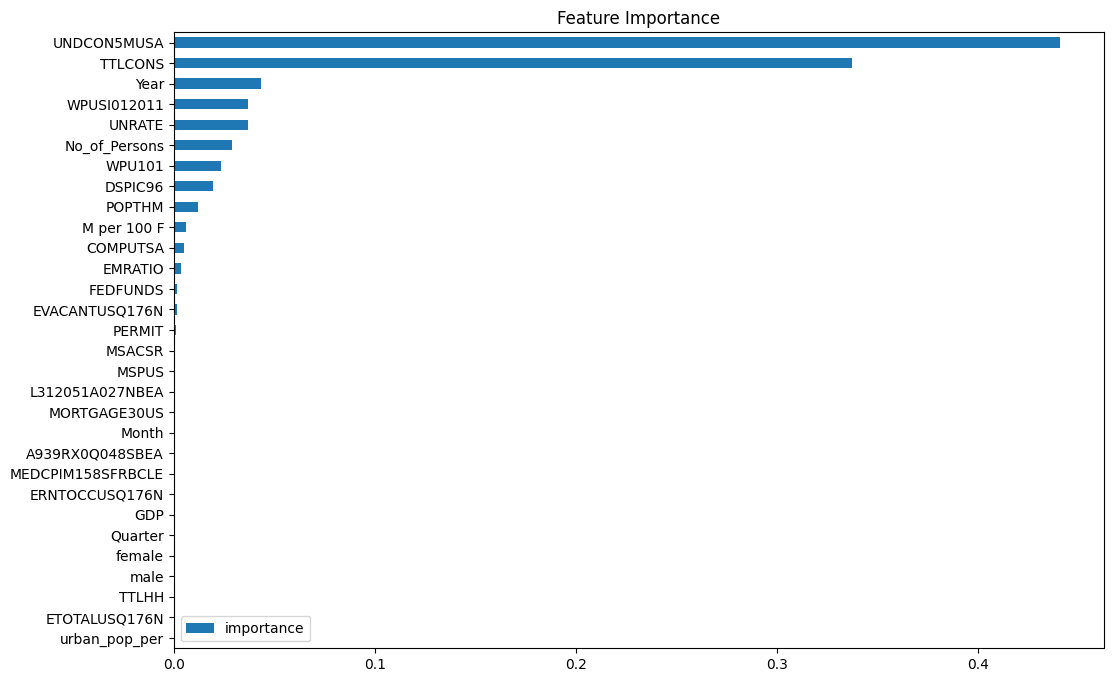

In [32]:
#Making feature_importances dataframe to plot and visualize the important feautres
f_imp = pd.DataFrame(data=forecast_reg.feature_importances_,
             index=forecast_reg.feature_names_in_,
             columns=['importance'])
f_imp.sort_values('importance').plot(kind='barh', title="Feature Importance")
plt.show()

#Forecast on test data

In [33]:
#Storing the prediction in test_f(test data set) and merging it with original dataframe
test_f['prediction'] = forecast_reg.predict(X_test)
#merge test_f[['prediction']] & df and store it in a variable name df_f
df_f = df.merge(test_f[['prediction']],how='left',left_index=True, right_index=True)

#Let's plot and visualize the forecasted data

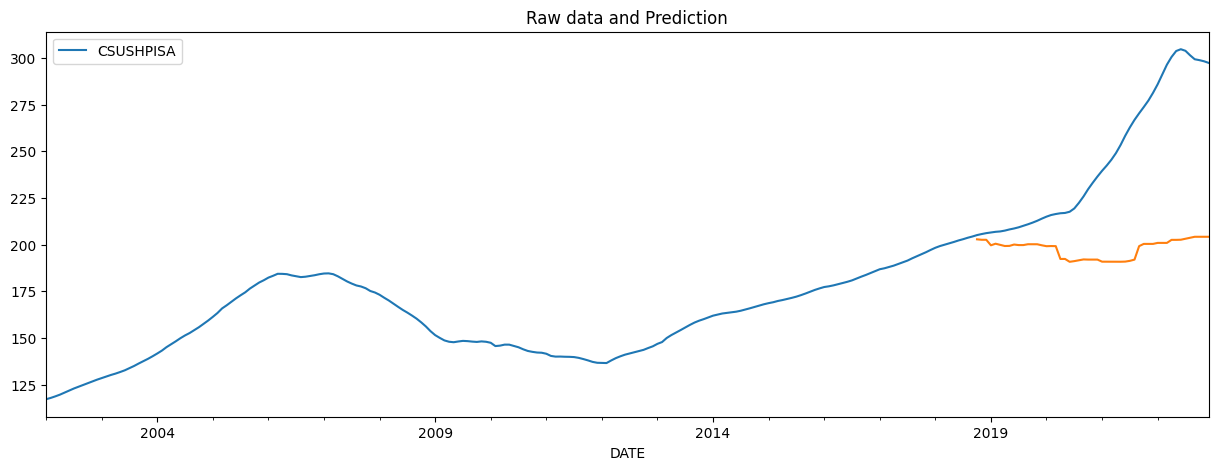

In [34]:
#Plot CSUSHPISA and forecasted CSUSHPISA for comparison
ax = df_f[['CSUSHPISA']].plot(figsize=(15,5))
df_f['prediction'].plot(ax=ax,style="-")
ax.set_title('Raw data and Prediction')
plt.show()

In [35]:
#Check RMSE score of the model
score = np.sqrt(mean_squared_error(test_f['CSUSHPISA'], test_f['prediction']))
print(f'RMSE score on test set: {score}')

RMSE score on test set: 58.65552908386014


#AS we can see the forecasting model is not so good, RMSE is quiet high around 58.5

#**Conclusion**

#By obersving both shapely model we can see that features like:
* UNRATE (Unemployment Rate)
* ERNTOCCUSQ176N (Housing Inventory Estimate Renter Occupied Housing Units in the United States)
* urban_pop_per
* Construction_price_index(WPUSI012011)
* GDP
* M per 100 F
* female
* male
* TTLCONS(Total_Construction_Spending_Total_Construction_in_the_United_States)
* TTLHH(Total Household)
* FEDFUNDS
* MORTGAGE30US

**have positively impacting the variable CSUSHPISA**
#features like:
* A939RX0Q048SBEA(Per Capita_GDP-)
* FEDFUNDS (Federal Funds Effective Rate)
* No_of_Persons
*
 Producer_Price_Index_by_Commodity_Metals_and_Metal_Products_Iron_and_Steel(WPU101)

 **negatively impacting the variable CSUSHPISA and rest of the feautre have very less or no impact on CSUSHPISA.**

#IN this project we are taking R2 score as evaluation metric b'coz of Simplicity of Interpretation.



#**Though Decision tree regressor has highest R2 score but for this project we'll consider Randomforest Regressor model as final model. B'coz Randomforest is a low variance and low bias model**.